In [47]:
import pandas as pd
from statsbombpy import sb
from tqdm import tqdm

In [48]:
sb.competitions()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [49]:
sb.matches(competition_id=2, season_id=27)
matches = sb.matches(competition_id=2, season_id=27)
matches.head()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [50]:
all_events = []

for match_id in tqdm(matches['match_id']):
    try:
        events = sb.events(match_id=match_id)
        events['match_id'] = match_id  # keep track
        all_events.append(events)
    except Exception as e:
        print(f"Error loading match {match_id}: {e}")


  0%|          | 0/380 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  0%|          | 1/380 [00:00<00:41,  9.12it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 3/380 [00:00<00:30, 12.33it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbo

In [51]:
pl_2016 = pd.concat(all_events, ignore_index=True)


In [52]:
print(pl_2016.columns.tolist())

['ball_receipt_outcome', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_o

In [53]:
pl_2016.groupby('player')

In [161]:
# Basic event filtering
passes = pl_2016[pl_2016['type'] == 'Pass'].groupby('player').size().rename('passes')
completed_passes = pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_outcome'].isna())].groupby('player').size().rename('completed_passes')
shots = pl_2016[pl_2016['type'] == 'Shot'].groupby('player').size().rename('shots')
xg = pl_2016[pl_2016['type'] == 'Shot'].groupby('player')['shot_statsbomb_xg'].sum().rename('xG')
xg = round(xg, 2)
carries = pl_2016[pl_2016['type'] == 'Carry'].groupby('player').size().rename('carries')
assists_for_shots = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_shot_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_shots')
)

assists_for_goals = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_goal_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_goals')
)

through_balls = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_through_ball'].notna())]
    .groupby('player')
    .size()
    .rename('through_balls')
)
duels_won = (
    pl_2016[
        (pl_2016['type'] == 'Duel') &
        ((pl_2016['duel_outcome'] == 'Won') | (pl_2016['duel_outcome'] == 'Success In Play'))
    ]
    .groupby('player')
    .size()
    .rename('duels_won')
)

interceptions = (
    pl_2016[
        (pl_2016['type'] == 'Interception') &
        ((pl_2016['interception_outcome'].notna()) & (pl_2016['interception_outcome'] != 'Lost In Play'))
    ]
    .groupby('player')
    .size()
    .rename('interceptions')
)

counterpresses = (
    pl_2016[pl_2016['counterpress'] == True]
    .groupby('player')
    .size()
    .rename('counterpresses')
)

all_dribbles = (
    pl_2016[(pl_2016['type'] == 'Dribble') & (pl_2016['dribble_outcome'].notna())]
    .groupby('player')
    .size()
    .rename('all_dribbles')
)

successful_dribbles = (
    pl_2016[
        (pl_2016['type'] == 'Dribble') &
        (pl_2016['dribble_outcome'] == 'Complete')
    ]
    .groupby('player')
    .size()
    .rename('successful_dribbles')
)

header_headers = (
    pl_2016[
        (pl_2016['type'] == 'Shot') &
        (pl_2016['shot_body_part'] == 'Head')
    ]
    .groupby('player')
    .size()
    .rename('headers')
)

clearances = (
    pl_2016[pl_2016['clearance_body_part'].notna()]
    .groupby('player')
    .size()
    .rename('clearances')
)


crosses = (
    pl_2016[pl_2016['pass_cross'].notna()]
    .groupby('player')
    .size()
    .rename('crosses')
)

cut_backs = (
    pl_2016[pl_2016['pass_cut_back'].notna()]
    .groupby('player')
    .size()
    .rename('cut_backs')
)

positions = (
    pl_2016[pl_2016['position'].notna()]
    .groupby('player')['position']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .rename('position')
)

#divide carry_end_location (where data is structured as [60.4, 43.6]) into carry_end_location_x and carry_end_location_y
carries_end = pl_2016[pl_2016['carry_end_location'].notna()]
pl_2016['carry_end_location_x'] = carries_end['carry_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)

pl_2016['carry_end_location_y'] = carries_end['carry_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_carry_end_location_x = (
    round(pl_2016[pl_2016['carry_end_location_x'].notna()]
    .groupby('player')['carry_end_location_x']
    .mean()
    .rename('avg_carry_end_location_x'), 2)
)
avg_carry_end_location_y = (
    round(pl_2016[pl_2016['carry_end_location_y'].notna()]
    .groupby('player')['carry_end_location_y']
    .mean()
    .rename('avg_carry_end_location_y'), 2)
)

#same as carry_end_location_x and carry_end_location_y, but for pass_end_location

passes_end = pl_2016[pl_2016['pass_end_location'].notna()]
pl_2016['pass_end_location_x'] = passes_end['pass_end_location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
pl_2016['pass_end_location_y'] = passes_end['pass_end_location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_pass_end_location_x = (
    round(pl_2016[pl_2016['pass_end_location_x'].notna()]
    .groupby('player')['pass_end_location_x']
    .mean()
    .rename('avg_pass_end_location_x'), 2)
)
avg_pass_end_location_y = (
    round(pl_2016[pl_2016['pass_end_location_y'].notna()]
    .groupby('player')['pass_end_location_y']
    .mean()
    .rename('avg_pass_end_location_y'), 2)
)

touch_location = pl_2016[pl_2016['location'].notna()]
pl_2016['touch_location_x'] = touch_location['location'].apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
pl_2016['touch_location_y'] = touch_location['location'].apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

avg_touch_location_x = (
    round(pl_2016[pl_2016['touch_location_x'].notna()]
    .groupby('player')['touch_location_x']
    .mean()
    .rename('avg_touch_location_x'), 2)
)
avg_touch_location_y = (
    round(pl_2016[pl_2016['touch_location_y'].notna()]
    .groupby('player')['touch_location_y']
    .mean()
    .rename('avg_touch_location_y'), 2)
)

pass_switch = (
    pl_2016[pl_2016['pass_switch'] == True]
    .groupby('player')
    .size()
    .rename('pass_switch')
)

avg_pass_length = (
    round(pl_2016[pl_2016['pass_length'].notna()]
    .groupby('player')['pass_length']
    .mean()
    .rename('avg_pass_length'), 2)
)

shots_after_dribbles = (
    round(pl_2016[pl_2016['shot_follows_dribble'] == True]
    .groupby('player')
    .size()
    .rename('shots_after_dribbles'), 2)
)

pass_events = pl_2016[pl_2016['type'] == 'Pass'].copy()
shot_events = pl_2016[pl_2016['type'] == 'Shot'].copy()

# Create a mapping from shot_id to xG
shot_xg_map = shot_events.set_index('id')['shot_statsbomb_xg'].dropna()

# Map xG to the pass
pass_events['xA'] = pass_events['pass_assisted_shot_id'].map(shot_xg_map)

x_assists = pass_events.groupby('player')['xA'].sum().rename('xA').round(2)








#adding minutes played
# Get substitutions only
subs = pl_2016[pl_2016['type'] == 'Substitution']

# Players subbed OFF
subbed_off = subs[['match_id', 'player', 'minute']].copy()
subbed_off['minutes_played'] = subbed_off['minute']  # played until subbed

# Players subbed ON
subbed_on = subs[['match_id', 'substitution_replacement', 'minute']].copy()
subbed_on.columns = ['match_id', 'player', 'minute']
subbed_on['minutes_played'] = 90 - subbed_on['minute']  # played from sub time to 90

# Concatenate subbed on + subbed off
sub_minutes = pd.concat([subbed_off, subbed_on])

# Other players (not subbed)
all_players = pl_2016[['match_id', 'player']].dropna().drop_duplicates()
sub_players = sub_minutes[['match_id', 'player']]
full_90_players = pd.merge(all_players, sub_players, on=['match_id', 'player'], how='left', indicator=True)
full_90_players = full_90_players[full_90_players['_merge'] == 'left_only'][['match_id', 'player']]
full_90_players['minutes_played'] = 90

# Combine everything
minutes_df = pd.concat([sub_minutes[['match_id', 'player', 'minutes_played']], full_90_players])

# Sum minutes across all matches per player
minutes_per_player = minutes_df.groupby('player')['minutes_played'].sum().rename('minutes')



full_nineties = round(minutes_per_player / 90, 1).rename('full_nineties')

pass_accuracy = round(completed_passes / passes * 100, 1).rename('pass_accuracy %')

# Merge all into a single DataFrame
newdf = pd.concat([passes, shots, xg, carries, assists_for_shots, through_balls, minutes_per_player, full_nineties, pass_accuracy, duels_won, interceptions, counterpresses, assists_for_goals, all_dribbles, successful_dribbles, header_headers, clearances, crosses, cut_backs, positions, avg_carry_end_location_x, avg_carry_end_location_y, avg_pass_end_location_x, avg_pass_end_location_y, pass_switch, avg_touch_location_x, avg_touch_location_y, x_assists, shots_after_dribbles, avg_pass_length], axis=1).fillna(0)

# Convert to integers where appropriate
for col in ['passes', 'shots', 'carries', 'assists_for_shots', 'through_balls', 'minutes', 'duels_won', 'pass_switch']:
    newdf[col] = newdf[col].astype(int)

# Reset index if you want a 'player' column instead of index
newdf = newdf.reset_index()



In [167]:
newdf = newdf[newdf['minutes'] > 500]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 544
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    385 non-null    object 
 1   passes                    385 non-null    int64  
 2   shots                     385 non-null    int64  
 3   xG                        385 non-null    float64
 4   carries                   385 non-null    int64  
 5   assists_for_shots         385 non-null    int64  
 6   through_balls             385 non-null    int64  
 7   minutes                   385 non-null    int64  
 8   full_nineties             385 non-null    float64
 9   pass_accuracy %           385 non-null    float64
 10  duels_won                 385 non-null    int64  
 11  interceptions             385 non-null    float64
 12  counterpresses            385 non-null    float64
 13  assists_for_goals         385 non-null    float64
 14  all_dribbles   

In [168]:
stats_to_per90 = [
    'player',
    'passes', 
    'shots', 'xG',
    'carries', 
    'assists_for_shots', 
    'through_balls', 
    'duels_won', 
    'interceptions', 
    'counterpresses', 
    'assists_for_goals', 
    'all_dribbles',
    'successful_dribbles',
    'headers',
    'clearances',
    'crosses',
    'cut_backs',
    'pass_switch',
    'shots_after_dribbles',
    'x_assists'
]
per90_stats = pd.DataFrame(columns=stats_to_per90)

for stat in stats_to_per90:
    if stat != 'player':
        per90_stats[stat] = round(newdf[stat].fillna(0) / newdf['full_nineties'], 2)
    else:
        per90_stats[stat] = newdf[stat]
    
for col in per90_stats.columns:
    if col != 'player':
        per90_stats.rename(columns={col: col + ' /90'}, inplace=True)
per90_stats = per90_stats.merge(newdf[['player', 'position', 'full_nineties', 'pass_accuracy %', 'avg_carry_end_location_x', 'avg_carry_end_location_y', 'avg_pass_end_location_x', 'avg_pass_end_location_y', 'avg_touch_location_x', 'avg_touch_location_y', 'avg_pass_length', 'avg_carry_length']], on='player', how='left')

per90_stats.head(10)

KeyError: 'x_assists'

In [97]:
position_map = {
    'Goalkeeper': 'GK',
    
    'Left Center Back': 'CB',
    'Right Center Back': 'CB',
    
    'Left Back': 'FB',
    'Right Back': 'FB',

    'Center Defensive Midfield': 'CDM',
    'Left Defensive Midfield': 'CDM',
    'Right Defensive Midfield': 'CDM',

    'Left Center Midfield': 'CM',
    'Right Center Midfield': 'CM',

    'Center Attacking Midfield': 'AM',

    'Left Wing': 'W',
    'Right Wing': 'W',
    'Right Midfield': 'W',
    'Left Midfield': 'W',

    'Center Forward': 'ST',
    'Left Center Forward': 'ST',
    'Right Center Forward': 'ST'
}

per90_stats['position'] = per90_stats['position'].map(position_map)


In [99]:
#delete all GKs from per90_stats
per90_stats = per90_stats[per90_stats['position'] != 'GK']

In [100]:
from sklearn.preprocessing import StandardScaler

# Select only per-90 and percentage features
features = [col for col in per90_stats.columns if col.endswith('/90')] + ['pass_accuracy %', 'avg_carry_end_location_x', 'avg_carry_end_location_y', 'avg_pass_end_location_x', 'avg_pass_end_location_y']
X = per90_stats[features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [101]:
features

['passes /90',
 'shots /90',
 'xG /90',
 'carries /90',
 'assists_for_shots /90',
 'through_balls /90',
 'duels_won /90',
 'interceptions /90',
 'counterpresses /90',
 'assists_for_goals /90',
 'all_dribbles /90',
 'successful_dribbles /90',
 'headers /90',
 'clearances /90',
 'crosses /90',
 'cut_backs /90',
 'pass_switch /90',
 'pass_accuracy %',
 'avg_carry_end_location_x',
 'avg_carry_end_location_y',
 'avg_pass_end_location_x',
 'avg_pass_end_location_y']

In [128]:
import umap.umap_ as umap

# UMAP works on scaled data
reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Add UMAP coordinates to the DataFrame
per90_stats['umap_x'] = embedding[:, 0]
per90_stats['umap_y'] = embedding[:, 1]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


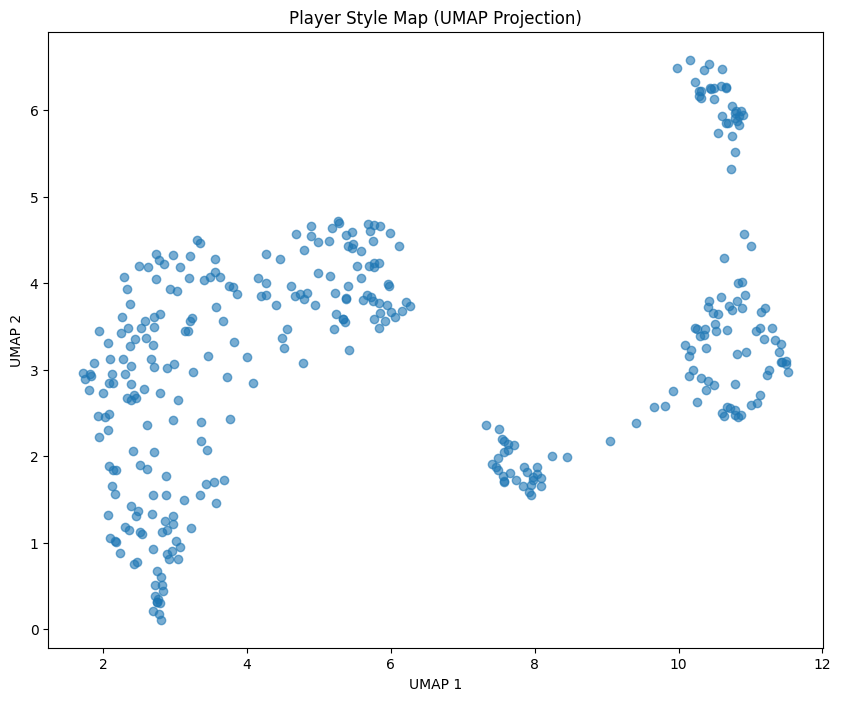

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(per90_stats['umap_x'], per90_stats['umap_y'], alpha=0.6)
plt.title('Player Style Map (UMAP Projection)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [131]:
from sklearn.mixture import GaussianMixture

gmm_level1 = GaussianMixture(n_components=7, random_state=42)
level1_clusters = gmm_level1.fit_predict(X_scaled)

per90_stats['main_cluster'] = level1_clusters
per90_stats['sub_cluster'] = 0
per90_stats['role'] = 0

cluster_counter = 0
for main_cluster_id in range(7):
    cluster_mask = level1_clusters == main_cluster_id
    cluster_data = X_scaled[cluster_mask]
    
    if len(cluster_data) > 1:
        gmm_level2 = GaussianMixture(n_components=2, random_state=42)
        sub_clusters = gmm_level2.fit_predict(cluster_data)
        
        per90_stats.loc[cluster_mask, 'sub_cluster'] = sub_clusters
        
        for sub_id in range(2):
            sub_mask = cluster_mask & (per90_stats['sub_cluster'] == sub_id)
            per90_stats.loc[sub_mask, 'role'] = cluster_counter
            cluster_counter += 1
    else:
        per90_stats.loc[cluster_mask, 'role'] = cluster_counter
        cluster_counter += 1


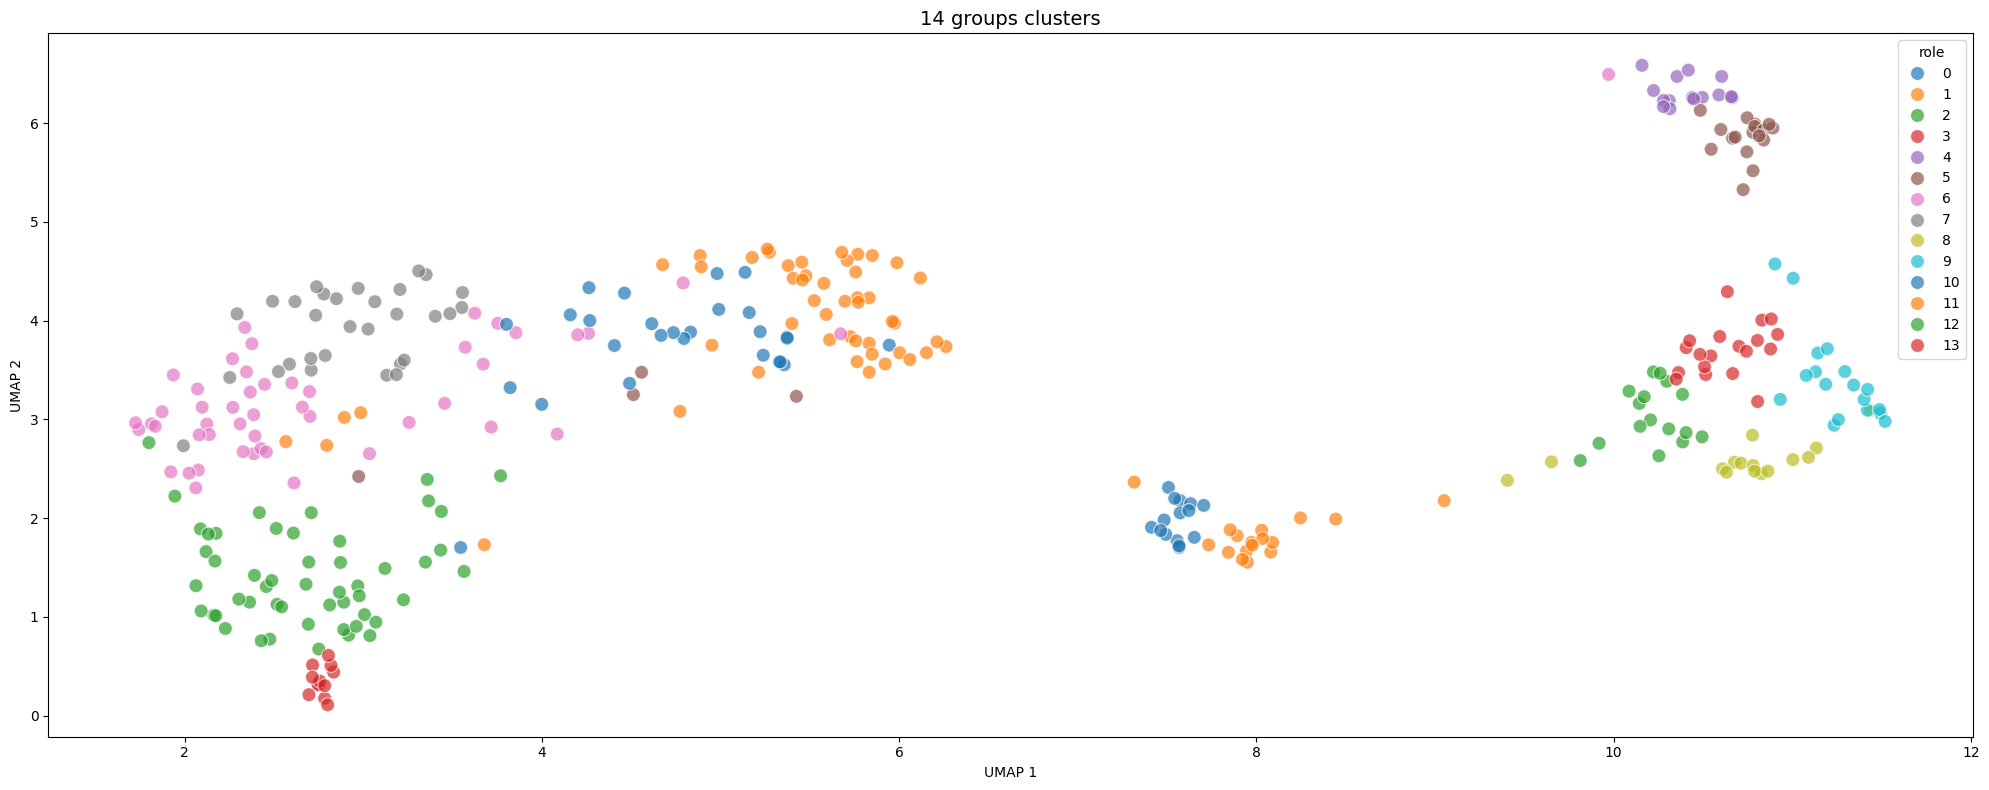

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 8))

sns.scatterplot(
    data=per90_stats,
    x='umap_x',
    y='umap_y',
    hue='role',
    palette='tab10',
    alpha=0.7,
    s=100,
    ax=ax1
)

ax1.set_title('14 groups clusters', fontsize=14)
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


In [133]:
print("=== Main clusters statistics ===")
main_cluster_summary = per90_stats.groupby('main_cluster')[features].mean().round(2)
display(main_cluster_summary)

print("\n=== Role statistics ===")
role_summary = per90_stats.groupby('role')[features].mean().round(2)
display(role_summary)

print("\n=== Analysis of differences between sub-clusters ===")
for main_cluster in range(7):
    subset = per90_stats[per90_stats['main_cluster'] == main_cluster]
    roles_in_cluster = sorted(subset['role'].unique())
    
    if len(roles_in_cluster) > 1:
        print(f"\nMain cluster {main_cluster} (roles {roles_in_cluster[0]} and {roles_in_cluster[1]}):")
        
        role1_stats = subset[subset['role'] == roles_in_cluster[0]][features].mean()
        role2_stats = subset[subset['role'] == roles_in_cluster[1]][features].mean()
        
        diff = abs(role1_stats - role2_stats).sort_values(ascending=False)
        print(f"  Top 3 differences:")
        for i, (feature, diff_val) in enumerate(diff.head(3).items()):
            val1 = role1_stats[feature]
            val2 = role2_stats[feature]
            print(f"    {i+1}. {feature}: {val1:.2f} vs {val2:.2f} (difference: {diff_val:.2f})")
    else:
        print(f"\nMain cluster {main_cluster}: only one role {roles_in_cluster[0]}")


=== Main clusters statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,...,headers /90,clearances /90,crosses /90,cut_backs /90,pass_switch /90,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y
main_cluster,,,,,,,,,,,,,,,,,,,,,
0,54.19,1.00,0.07,42.05,0.75,0.24,1.79,1.23,8.11,0.05,...,0.09,2.02,0.60,0.03,1.65,82.26,62.42,39.25,66.32,39.34
1,28.18,2.56,0.34,25.97,0.89,0.17,0.64,0.35,4.95,0.10,...,0.63,0.90,0.80,0.13,0.46,71.87,79.16,40.35,76.64,40.65
2,51.56,0.55,0.03,33.63,0.59,0.10,1.34,0.91,5.25,0.05,...,0.06,3.22,1.94,0.14,0.97,74.54,66.65,64.75,70.25,58.96
3,47.05,2.01,0.17,44.33,1.60,0.42,1.01,0.65,6.35,0.18,...,0.08,0.72,2.35,0.22,1.65,75.14,76.47,39.11,78.43,39.35
4,32.39,0.47,0.05,19.74,0.13,0.06,0.87,0.97,3.18,0.01,...,0.29,7.11,0.13,0.01,0.76,75.80,44.59,43.33,55.54,41.71
5,52.08,0.65,0.04,34.03,0.76,0.08,1.17,1.14,4.77,0.09,...,0.04,3.35,2.42,0.11,1.23,73.59,66.39,13.15,69.67,19.89
6,48.18,0.49,0.05,33.39,0.17,0.05,0.99,1.27,3.54,0.01,...,0.28,6.52,0.13,0.01,1.38,84.43,45.55,37.97,53.66,38.32



=== Role statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,...,headers /90,clearances /90,crosses /90,cut_backs /90,pass_switch /90,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y
role,,,,,,,,,,,,,,,,,,,,,
0,56.50,1.12,0.09,42.79,0.90,0.28,1.28,0.92,6.87,0.07,...,0.07,1.88,0.87,0.02,2.38,81.13,63.11,39.31,68.15,39.82
1,52.94,0.93,0.06,41.65,0.67,0.22,2.06,1.40,8.78,0.04,...,0.10,2.10,0.45,0.04,1.26,82.87,62.05,39.21,65.33,39.08
2,28.15,2.40,0.32,27.03,0.90,0.15,0.64,0.38,5.11,0.09,...,0.45,0.84,0.86,0.15,0.49,72.85,79.08,40.47,76.67,40.61
3,28.30,3.23,0.44,21.42,0.82,0.22,0.63,0.22,4.26,0.13,...,1.36,1.13,0.56,0.08,0.33,67.71,79.49,39.81,76.50,40.79
4,60.36,0.47,0.02,41.04,0.64,0.12,1.47,1.01,5.46,0.09,...,0.03,3.24,2.32,0.22,1.08,78.53,67.22,67.38,68.97,60.48
5,45.28,0.60,0.04,28.33,0.56,0.09,1.25,0.84,5.09,0.02,...,0.08,3.20,1.66,0.09,0.89,71.69,66.25,62.88,71.16,57.87
6,40.88,1.90,0.15,39.96,1.32,0.26,0.98,0.66,6.26,0.11,...,0.07,0.79,2.38,0.22,1.47,73.68,76.67,38.37,78.05,38.84
7,57.11,2.20,0.21,51.48,2.05,0.68,1.07,0.63,6.49,0.30,...,0.10,0.62,2.29,0.23,1.94,77.53,76.15,40.32,79.05,40.17
8,31.83,0.43,0.04,18.66,0.11,0.08,0.80,0.99,3.09,0.01,...,0.28,7.39,0.14,0.02,0.74,74.27,44.77,29.43,56.16,32.32



=== Analysis of differences between sub-clusters ===

Main cluster 0 (roles 0 and 1):
  Top 3 differences:
    1. passes /90: 56.50 vs 52.94 (difference: 3.56)
    2. avg_pass_end_location_x: 68.15 vs 65.33 (difference: 2.82)
    3. counterpresses /90: 6.87 vs 8.78 (difference: 1.91)

Main cluster 1 (roles 2 and 3):
  Top 3 differences:
    1. carries /90: 27.03 vs 21.42 (difference: 5.61)
    2. pass_accuracy %: 72.85 vs 67.71 (difference: 5.14)
    3. all_dribbles /90: 2.49 vs 1.53 (difference: 0.95)

Main cluster 2 (roles 4 and 5):
  Top 3 differences:
    1. passes /90: 60.36 vs 45.28 (difference: 15.08)
    2. carries /90: 41.04 vs 28.33 (difference: 12.71)
    3. pass_accuracy %: 78.53 vs 71.69 (difference: 6.84)

Main cluster 3 (roles 6 and 7):
  Top 3 differences:
    1. passes /90: 40.88 vs 57.11 (difference: 16.23)
    2. carries /90: 39.96 vs 51.48 (difference: 11.53)
    3. pass_accuracy %: 73.68 vs 77.53 (difference: 3.86)

Main cluster 4 (roles 8 and 9):
  Top 3 differen

In [147]:
per90_stats.loc[per90_stats['role'] == (10)].head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,...,pass_accuracy %,avg_carry_end_location_x,avg_carry_end_location_y,avg_pass_end_location_x,avg_pass_end_location_y,umap_x,umap_y,main_cluster,sub_cluster,role
3,Abdul Rahman Baba,57.61,0.53,0.03,40.27,0.18,0.09,2.21,1.77,5.75,...,80.5,64.19,10.80,64.32,17.05,7.573205,2.176969,5,0,10
9,Alberto Moreno Pérez,61.59,1.20,0.05,40.95,1.91,0.11,1.59,1.13,6.75,...,78.3,68.84,11.61,69.90,21.09,7.412895,1.906430,5,0,10
11,Aleksandar Kolarov,69.84,1.61,0.07,48.19,1.38,0.12,0.67,0.79,4.41,...,75.5,70.21,9.84,72.54,19.31,7.556302,1.771169,5,0,10
55,Cameron Borthwick-Jackson,62.86,0.13,0.00,41.30,0.78,0.00,0.78,1.30,6.49,...,78.1,68.80,9.88,69.46,16.22,7.483548,1.980424,5,0,10
62,Charlie Daniels,61.34,0.63,0.08,42.88,0.85,0.05,0.90,0.52,3.29,...,78.8,65.09,10.24,67.92,16.86,7.567588,1.703143,5,0,10
69,Christian Fuchs,55.32,0.63,0.03,25.88,1.43,0.10,2.19,1.73,5.65,...,67.7,58.43,11.35,72.42,20.04,7.573196,2.052750,5,0,10
78,César Azpilicueta Tanco,61.92,0.31,0.04,36.65,0.48,0.11,1.83,1.13,6.20,...,81.1,64.60,27.94,67.91,31.18,7.507825,2.309880,5,0,10
86,Danny Rose,60.46,1.10,0.04,41.77,0.84,0.13,1.81,1.10,5.91,...,75.2,66.85,10.96,68.53,17.65,7.567034,1.719262,5,0,10
112,Erik Pieters,56.86,0.15,0.00,35.87,0.52,0.15,1.63,1.74,5.84,...,74.9,58.76,11.39,64.02,18.53,7.631846,2.145335,5,0,10
118,Faustino Marcos Alberto Rojo,64.89,0.58,0.02,39.21,0.65,0.00,1.73,1.15,6.40,...,72.0,66.98,9.53,70.54,17.51,7.622343,2.076241,5,0,10


In [148]:
"""cluster 0-1 -- cdm (1 more proactive)
2-3 -- STs (2 more mobile, 3 targetman)
4-5 -- FBs (5 more defensive)
6-7 -- W/CAMs (7 more creative)
8-9 -- CBs
10-11 -- FBs (more like WBs)
12-13 -- CBs
"""

'cluster 0-1 -- cdm (1 more proactive)\n2-3 -- STs (2 more mobile, 3 targetman)\n4-5 -- FBs (5 more defensive)\n6-7 -- W/CAMs (7 more creative)\n8-9 -- CBs\n10-11 -- FBs (more like WBs)\n12-13 -- CBs\n'